In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())

In [7]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

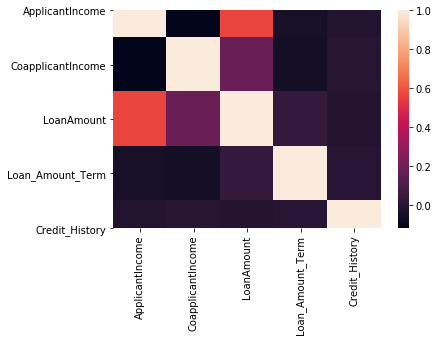

In [8]:
sns.heatmap(loan.corr())

In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


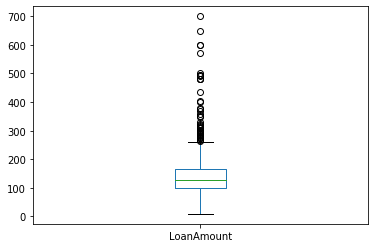

In [10]:
loan['LoanAmount'].plot('box')

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
loan['Loan_ID']=le.fit_transform(loan['Loan_ID'])
loan['Gender']=le.fit_transform(loan['Gender'])
loan['Married']=le.fit_transform(loan['Married'])
loan['Dependents']=le.fit_transform(loan['Dependents'])
loan['Education']=le.fit_transform(loan['Education'])
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])
loan['Property_Area']=le.fit_transform(loan['Property_Area'])
loan['Loan_Status']=le.fit_transform(loan['Loan_Status'])

In [13]:
loan.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

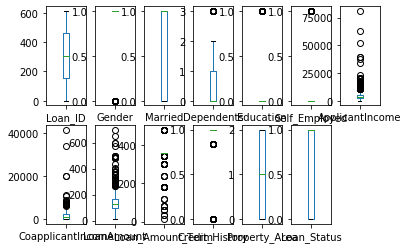

In [14]:
loan.plot(kind='box',layout=(2,7),subplots=True)

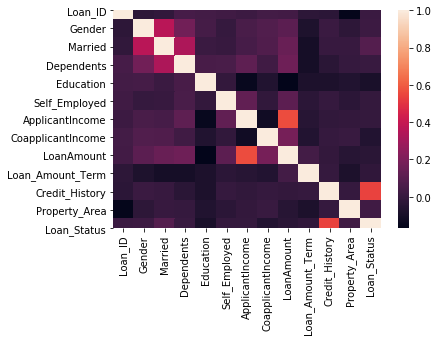

In [15]:
sns.heatmap(loan.corr())

In [16]:
loan.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [17]:
from scipy.stats import zscore
dt=abs(zscore(loan))
print(loan.shape)
loan_new=loan.loc[(dt<3).all(axis=1)]
print(loan_new.shape)

(614, 13)
(577, 13)


In [18]:
loan_new.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [19]:
for i in loan_new.columns:
    if loan_new.skew().loc[i]>0.50:
        loan_new[i]=np.sqrt(loan_new[i])
        
print(loan_new.skew())

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64


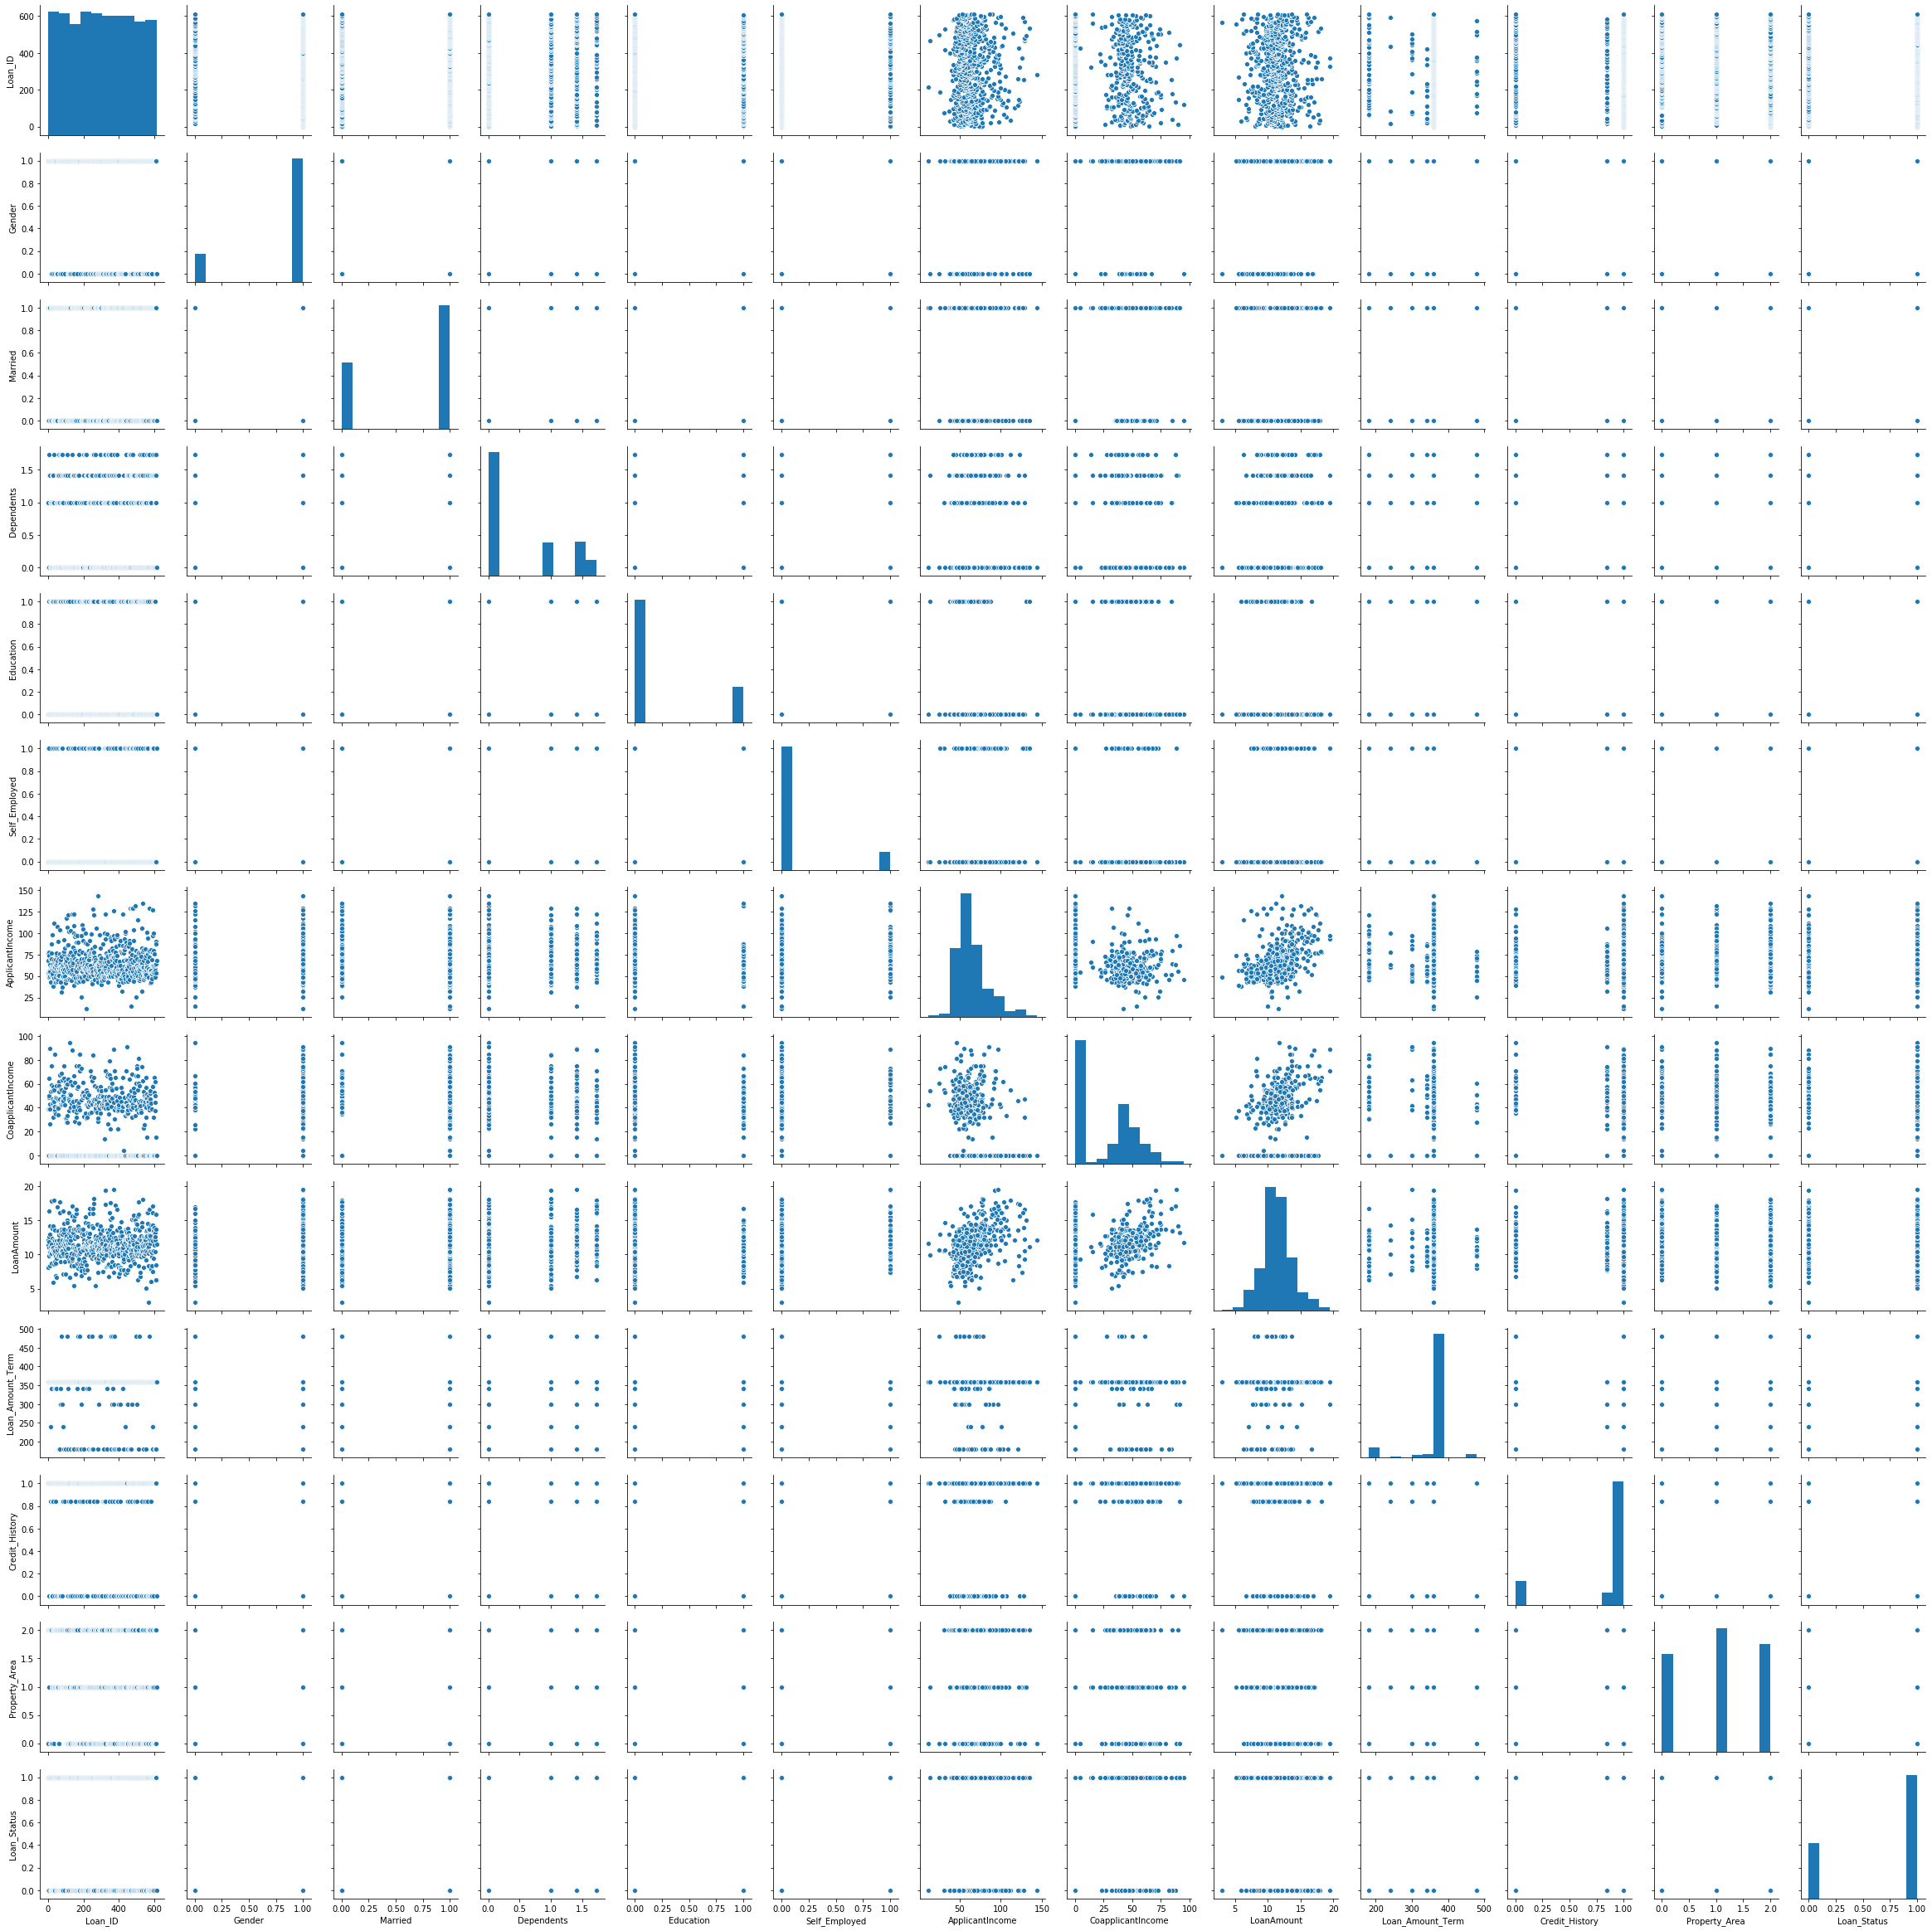

In [20]:
sns.pairplot(loan_new)

In [21]:
x=loan_new.drop(columns=['Loan_Status'])
y=loan_new['Loan_Status']

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report


In [23]:
def max_r2(model,x,y):
    maxsrc=0
    for r in range(45,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2src=r2_score(y_test,y_pred)
        if maxsrc<r2src:
            maxsrc=r2src
            final=r
            print("for final state",final,'max r2 score is:',maxsrc)
    print('score of the model:',model.score(x_train,y_train))
    print('accuracy of the model:',accuracy_score(y_test,y_pred))
    print('Confussion matrix:',confusion_matrix(y_test,y_pred))
    print('Clasification report:',classification_report(y_test,y_pred))
    
    
    print('Cross val score:',cross_val_score(model,x,y,cv=5).mean())

In [24]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_r2(lg,x,y)

for final state 45 max r2 score is: 0.1376127973748975
for final state 47 max r2 score is: 0.1985544217687072
for final state 52 max r2 score is: 0.3296347665279704
for final state 68 max r2 score is: 0.38526762056173824
score of the model: 0.8240740740740741
accuracy of the model: 0.8068965517241379
Confussion matrix: [[18 26]
 [ 2 99]]
Clasification report:               precision    recall  f1-score   support

           0       0.90      0.41      0.56        44
           1       0.79      0.98      0.88       101

    accuracy                           0.81       145
   macro avg       0.85      0.69      0.72       145
weighted avg       0.82      0.81      0.78       145

Cross val score: 0.8181811725716088


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dct=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
clf=GridSearchCV(dct,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy'}

In [27]:
dct=DecisionTreeClassifier('entropy')
max_r2(dct,x,y)

for final state 55 max r2 score is: 0.008207934336525557
score of the model: 1.0
accuracy of the model: 0.6896551724137931
Confussion matrix: [[17 27]
 [18 83]]
Clasification report:               precision    recall  f1-score   support

           0       0.49      0.39      0.43        44
           1       0.75      0.82      0.79       101

    accuracy                           0.69       145
   macro avg       0.62      0.60      0.61       145
weighted avg       0.67      0.69      0.68       145

Cross val score: 0.7002459296667456


In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
max_r2(kn,x,y)

score of the model: 0.7361111111111112
accuracy of the model: 0.6413793103448275
Confussion matrix: [[10 34]
 [18 83]]
Clasification report:               precision    recall  f1-score   support

           0       0.36      0.23      0.28        44
           1       0.71      0.82      0.76       101

    accuracy                           0.64       145
   macro avg       0.53      0.52      0.52       145
weighted avg       0.60      0.64      0.61       145

Cross val score: 0.5752623688155921


In [29]:
from sklearn.svm import SVC
svc=SVC()
max_r2(svc,x,y)

score of the model: 1.0
accuracy of the model: 0.696551724137931
Confussion matrix: [[  0  44]
 [  0 101]]
Clasification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.70      1.00      0.82       101

    accuracy                           0.70       145
   macro avg       0.35      0.50      0.41       145
weighted avg       0.49      0.70      0.57       145

Cross val score: 0.6897808990241722


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
max_r2(rfr,x,y)

for final state 45 max r2 score is: 0.048400328137817916
for final state 48 max r2 score is: 0.21298306556665225
for final state 52 max r2 score is: 0.2625982431807674
for final state 71 max r2 score is: 0.27594442032132005
score of the model: 0.9861111111111112
accuracy of the model: 0.7310344827586207
Confussion matrix: [[18 26]
 [13 88]]
Clasification report:               precision    recall  f1-score   support

           0       0.58      0.41      0.48        44
           1       0.77      0.87      0.82       101

    accuracy                           0.73       145
   macro avg       0.68      0.64      0.65       145
weighted avg       0.71      0.73      0.72       145

Cross val score: 0.7295397038322944


In [31]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01, 'n_estimators': 50}

In [33]:
gbr=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50)
max_r2(gbr,x,y)

for final state 45 max r2 score is: 0.1376127973748975
for final state 47 max r2 score is: 0.1677295918367343
for final state 52 max r2 score is: 0.3296347665279704
for final state 55 max r2 score is: 0.33880528955768363
for final state 84 max r2 score is: 0.37181447502548415
score of the model: 0.8379629629629629
accuracy of the model: 0.7793103448275862
Confussion matrix: [[16 28]
 [ 4 97]]
Clasification report:               precision    recall  f1-score   support

           0       0.80      0.36      0.50        44
           1       0.78      0.96      0.86       101

    accuracy                           0.78       145
   macro avg       0.79      0.66      0.68       145
weighted avg       0.78      0.78      0.75       145

Cross val score: 0.8130087587785054


In [34]:
adb=AdaBoostClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.001, 'n_estimators': 10}

In [35]:
adb=AdaBoostClassifier(learning_rate=0.001,n_estimators=10)
max_r2(adb,x,y)

for final state 45 max r2 score is: 0.1376127973748975
for final state 47 max r2 score is: 0.1677295918367343
for final state 52 max r2 score is: 0.3296347665279704
for final state 55 max r2 score is: 0.33880528955768363
for final state 68 max r2 score is: 0.34684684684684686
for final state 84 max r2 score is: 0.37181447502548415
score of the model: 0.8217592592592593
accuracy of the model: 0.8068965517241379
Confussion matrix: [[18 26]
 [ 2 99]]
Clasification report:               precision    recall  f1-score   support

           0       0.90      0.41      0.56        44
           1       0.79      0.98      0.88       101

    accuracy                           0.81       145
   macro avg       0.85      0.69      0.72       145
weighted avg       0.82      0.81      0.78       145

Cross val score: 0.8181811725716088


In [ ]:
from sklearn.externals import joblib
joblib.dump(lg,'Loan.pk1')